## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df=pd.read_csv('/content/drive/MyDrive/Capstone project_/Airbnb NYC 2019.csv')

In [9]:
df.shape

(48895, 16)

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


***DATA CLEANING AND WRANGLING***

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Percentage of null values**


In [12]:
pd.DataFrame(round(df.isnull().mean()*100,2))

,0
id,0.00
name,0.03
host_id,0.00
host_name,0.04
neighbourhood_group,0.00
neighbourhood,0.00
latitude,0.00
longitude,0.00
room_type,0.00
price,0.00


In [13]:
null_val=pd.DataFrame(round(df.isnull().mean()*100,2)) #percentage of null values
null_val.rename(columns={0:'null_percentage'},inplace=True)
null_val['col_name']=null_val.index

In [14]:
null_val.columns

Index(['null_percentage', 'col_name'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


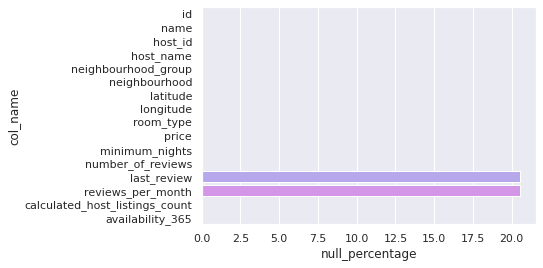

In [15]:
sns.barplot(null_val['null_percentage'],null_val['col_name'])

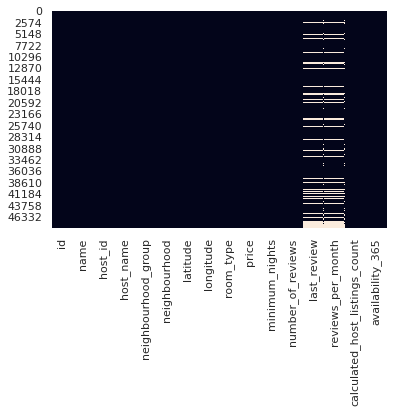

In [16]:
sns.heatmap(df.isnull(),cbar=False) #visualisation of null values

Since percentage of null in name,host_name variable is less as compared to whole dataset we can remove the Null but in case of last review we can remove this column as because if review per month will be 0 we can thought from there that it's last month someone provided last _review

In [17]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

From above we can see that whenver last review present as NaN also review per month present as NaN

In [19]:
df.drop(['id','last_review'],axis=1,inplace=True) #Dropping the columns which are not required for futher analysis

In [20]:
df['reviews_per_month'].fillna(0,inplace=True) #filling the review per month will be filled as 0 if review per month is NaN

In [21]:
df.isnull().sum() #Null value sum

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [23]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [24]:
host_ID=pd.DataFrame(df.host_id.value_counts().sort_values(ascending=False))  #Creating the count of Host ID in DataFrame

In [25]:
host_ID=host_ID.reset_index()

In [26]:
host_ID.columns

Index(['index', 'host_id'], dtype='object')

In [27]:
host_ID.rename(columns={'index':'host_id','host_id':'total'},inplace=True) #Renaming the columns

In [28]:
host_ID.head()

,host_id,total
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

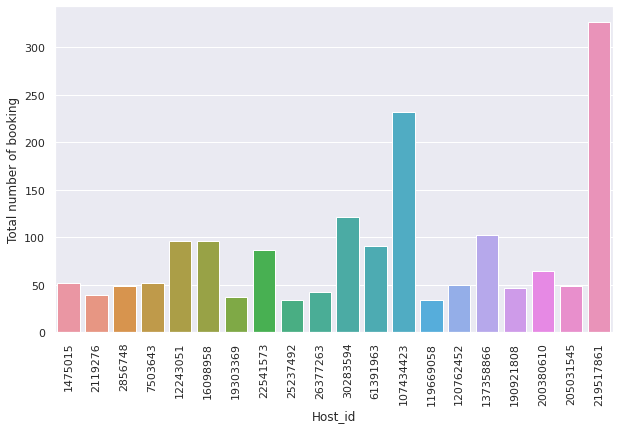

In [29]:
#Visualising the host id counts
plt.rcParams['figure.figsize']=(10,6)
sns.barplot(x='host_id',y='total',data=host_ID.iloc[:20,:])
plt.xlabel('Host_id')
plt.ylabel('Total number of booking')
plt.xticks(rotation=90)


**TOP 10 host ID**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

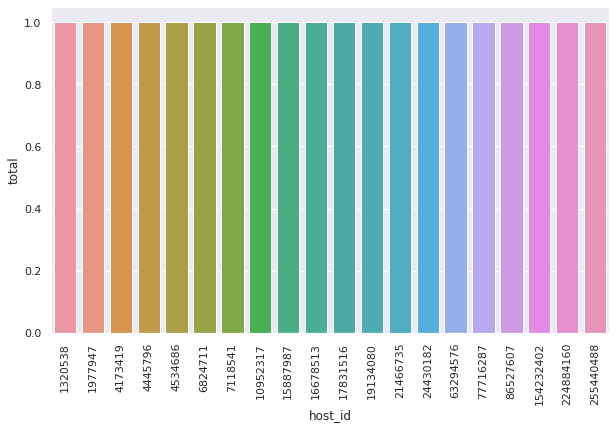

In [30]:
sns.barplot(x='host_id',y='total',data=host_ID.iloc[-20:,:]) #botton 10 host id.... we can see that all present as 1
plt.xticks(rotation=90)

**Bottom 10 host id**


In [31]:
df[df['host_id']==219517861] #checking for data of highest host_id it present from Manhatten 

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


**Top 10 host list according to hosting**

In [32]:
host_list=list(host_ID['host_id'].iloc[:10])

In [33]:
df['neighbourhood_group'].value_counts() #Neighbourhood group count of values

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


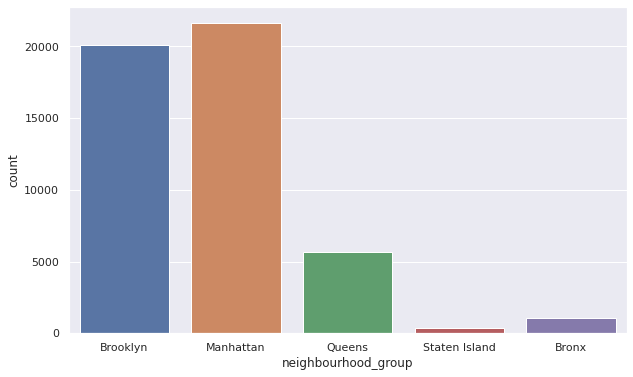

In [34]:
sns.countplot(df['neighbourhood_group']) #visualising the Neighbourhood group

Brooklyn and Manhatten are famous places because there are maximum no. of hosting take place

In [35]:
df['price'].describe(include='all')

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [36]:
upper_limit=175+1.5*(175-69)# upper IQ limt

seems like there are outlier let see it according neighbourhood group

In [37]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

As these place are more visited so demand is higher for Brooklyn and Manhatten but seems like there may  be outliers in staten Island as demand is lower in previous data

In [38]:
df[df['price']<=upper_limit].groupby('neighbourhood_group')['price'].mean()      #Removing outlier then checking for neighbourhood and price

neighbourhood_group
Bronx             77.365421
Brooklyn         105.699614
Manhattan        145.952835
Queens            88.904437
Staten Island     89.235616
Name: price, dtype: float64

In [39]:
price_iqr=df[df['price']<=upper_limit]      #price_iqr for price lesser then higher iqr limit

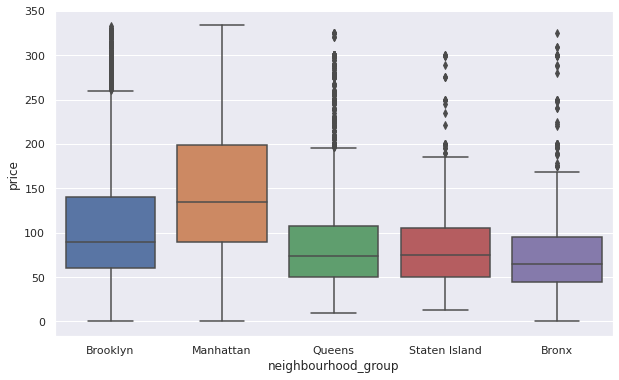

In [40]:
sns.boxplot(x='neighbourhood_group',y='price',data=price_iqr) #visualising the cost with neighbourhood group

So by plotting box plot we gott to know that Manhatten have higher price followed by Brooklyn,Queens,Staten island

Let see how it varying according to neighborhood

In [41]:
neighborhood=pd.DataFrame(df['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()) #count for neighbourhood 

In [42]:
neighborhood.rename(columns={'index':'neighborhood','neighbourhood':'count'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

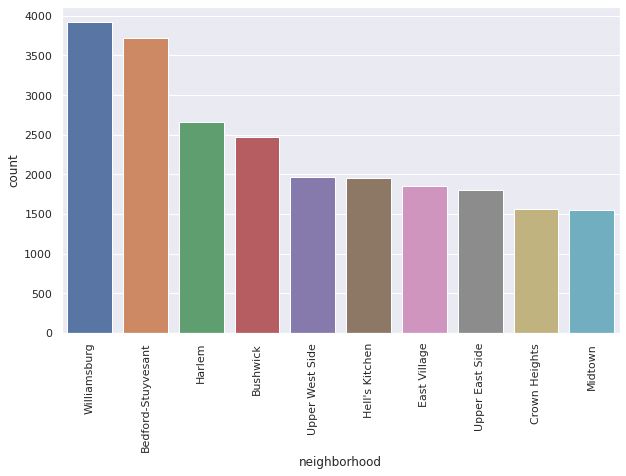

In [43]:
sns.barplot(x='neighborhood',y='count',data=neighborhood.iloc[:10,:]) #Visualising the top 10  neighbour
plt.xticks(rotation=90)

In [44]:
list_of_top10_neighbourhood=list(neighborhood['neighborhood'].iloc[:5])

**Let see what type of room they prefer in these city**

In [45]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [46]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [47]:
res=pd.DataFrame(df['room_type'].value_counts().reset_index())
res.columns

Index(['index', 'room_type'], dtype='object')

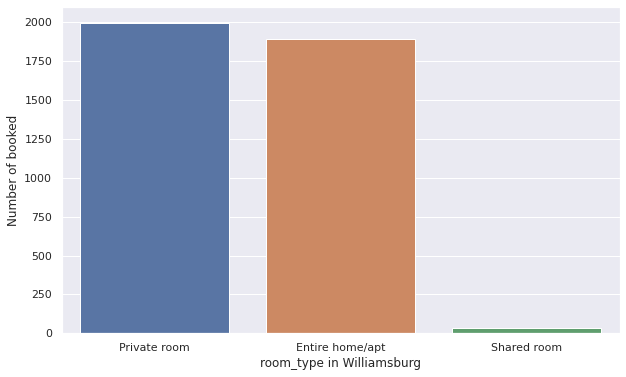

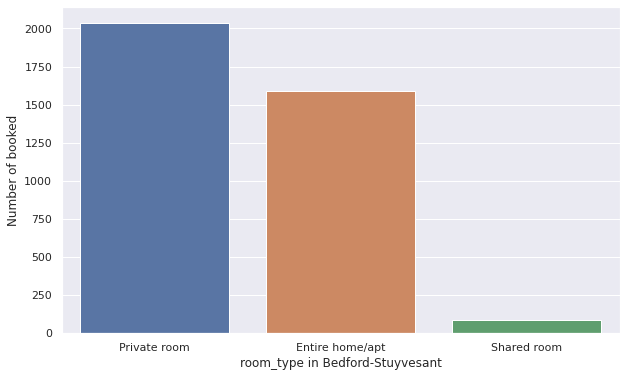

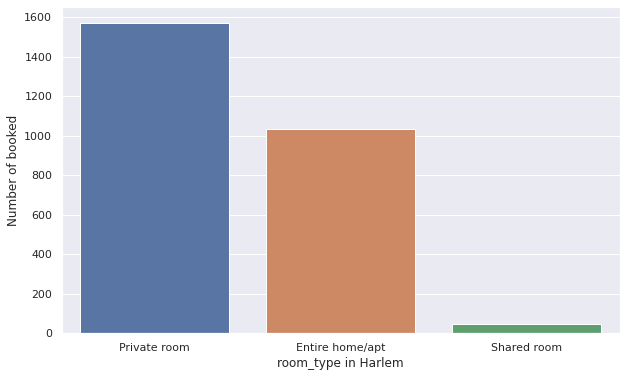

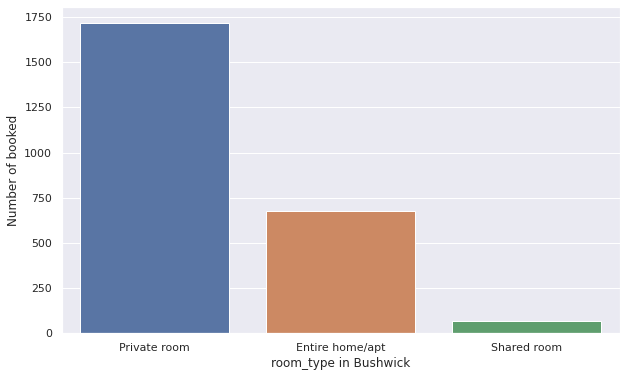

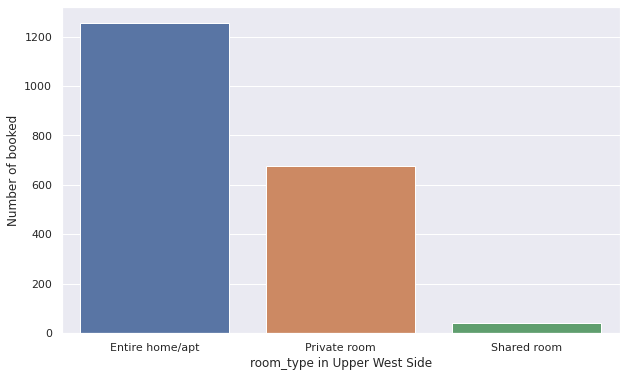

In [48]:
#Room type booked in most visited city for top 5
for neigh in list_of_top10_neighbourhood:
  res=df[df['neighbourhood']==neigh]
  res=pd.DataFrame(res['room_type'].value_counts().reset_index())
  sns.barplot(x='index',y='room_type',data=res)
  plt.xlabel("room_type in "+neigh)
  plt.ylabel("Number of booked")
  plt.show()

After checking for top 5 city room type we got to know that each type  people want entire room or apartment or private room that is also signal that people are from mainly above medium class or medium class family

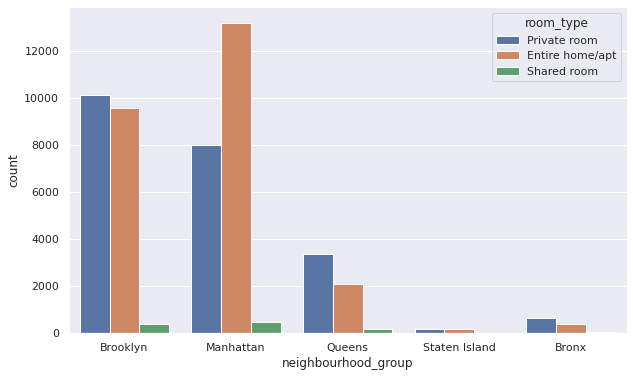

In [49]:
#Let see what type of room prefered in neighbourhood group
sns.countplot(data = df, x = 'neighbourhood_group', hue ='room_type')


We can notice that appartment type room are mostly booked in manhatten that must be the reason of more booking in manhatten

In [50]:
df[df['neighbourhood_group']=='Manhattan'].groupby('room_type')['price'].mean()

room_type
Entire home/apt    249.239109
Private room       116.776622
Shared room         88.977083
Name: price, dtype: float64

In [51]:
df[df['neighbourhood_group']=='Brooklyn'].groupby('room_type')['price'].mean()

room_type
Entire home/apt    178.327545
Private room        76.500099
Shared room         50.527845
Name: price, dtype: float64

In [52]:
df[df['neighbourhood_group']=='Queens'].groupby('room_type')['price'].mean()

room_type
Entire home/apt    147.050573
Private room        71.762456
Shared room         69.020202
Name: price, dtype: float64

In [53]:
df[df['neighbourhood_group']=='Bronx'].groupby('room_type')['price'].mean()

room_type
Entire home/apt    127.506596
Private room        66.788344
Shared room         59.800000
Name: price, dtype: float64

In [54]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [68]:
def top10words(neighbourhood_group):
  '''It gives the top n words for any neighbourhood group '''
  sent=""
  for index,row in df[df['neighbourhood_group']==neighbourhood_group].iterrows():
      try:
        sent=sent+" "+df.loc[index,'name']
      except:
        sent=sent+str(df.loc[index,'name'])
  temp=[word for word in sent.split(' ')]
  count_of_words={}
  for word in temp:
    if word in count_of_words.keys():
      count_of_words[word]+=1
    else:
      count_of_words[word]=0
  
  key_reversal=dict(zip(list(count_of_words.values()),list(count_of_words.keys())))
  list_of_key =list(key_reversal.keys())
  list_of_key.sort()
  final_result=[]
  for i in list_of_key[:60]:
    final_result.append(key_reversal[i])
  return final_result


In [69]:
#analysis of words present in name
for j in list(df['neighbourhood_group'].unique()): 
  print(f"{j} famous word = ",end=" ")
  for i in top10words(j):
    print(i,end=" ")
  print("\n\n")

Brooklyn famous word =  _ excellent female. GO Male 47 Buffalo (Private WiFi BRAND ♀ natural Manhattan!) Plant Cumberland Minimal METRO Hostel BEDS Walk artistic Rustic Easy ENTIRE HEART newly High Quaint is MODERN Mins Madison Charming, Budget bedroom, Neighborhood Basement 25 Single For nice bedrooms Medical Cool furnished Yard THE light Clean, big trendy Apt, Minutes historic trains views Manhattan! ! Super two 


Manhattan famous word =  Square-cozy Cinema, ⭐ View- 2Ba sundeck, Polished Original Dapper 11th San Nights 4BR/2BA Apple Fitness Premier World Hanover stylish 107 STREET Minutes Biltmore DOUBLE male Rise 20 UN Spot an Theater Street, flat Beekman Lounge right Manhattan. Indoor Simple Water living Tower Nash room, Double street perfect Serviced FEE* Doorman, SPACIOUS center GUEST Getaway John Room, Madison AMAZING Artist South 


Queens famous word =  QUIT step View✨ 20m/LGA,JFK❥❥ can 25m/city, prime Hotel-Like downtown garden-Midtown1stop-Breakfast home! york Elmhurst Cent

As we can see Brooklyn and Manhattan are using various kind of service and Manhattan focusing toward for engaging things like gym,Sundeck,fitness related things

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


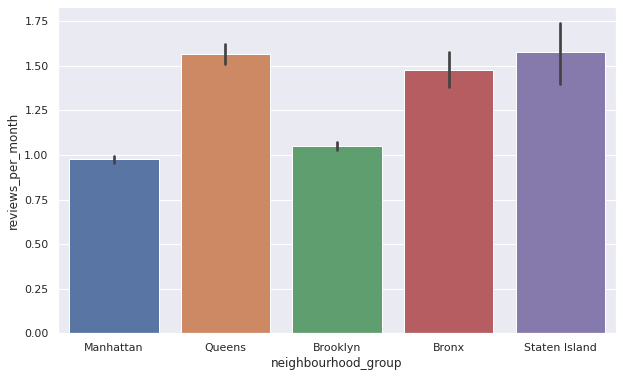

In [57]:
#Lets check for reviews
review=df['reviews_per_month'].sort_values(ascending=False).iloc[:] # we can use this as taking the number of observation
sns.barplot(df['neighbourhood_group'][review.index],review)

This increase lower visited maybe because it's voted by less people and this seems to be not good enough in analyzing these places but incase of Manhattan which is visited by more like to have average number of votes as more people are visited

In [58]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


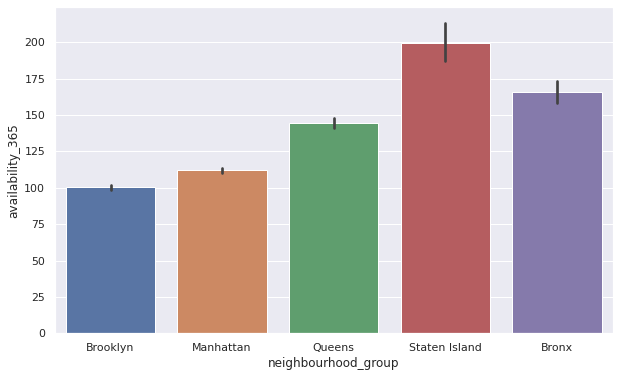

In [59]:
sns.barplot(df['neighbourhood_group'],df['availability_365'])

From here we conclude that availibiliy will not present in traffic area but it will be present in non traffic area

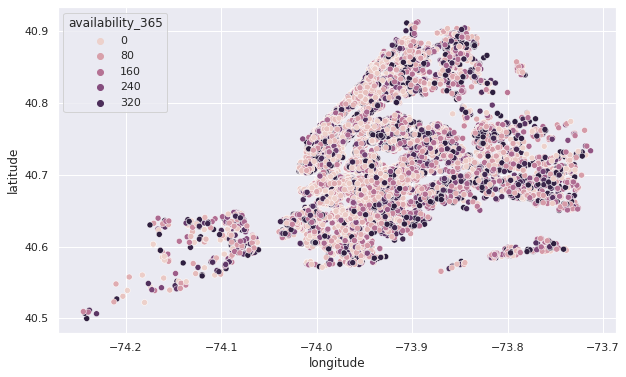

In [60]:
sns.scatterplot(x='longitude',y='latitude',hue='availability_365',data=df)

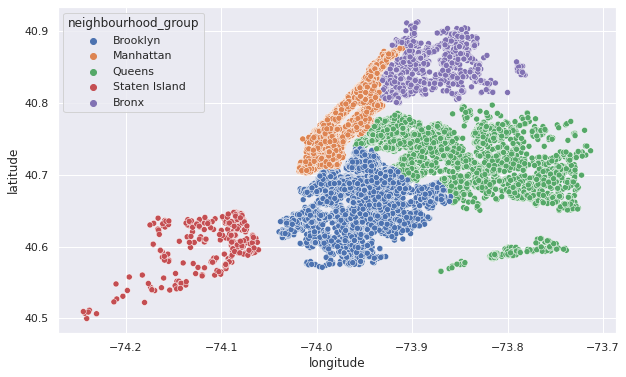

In [61]:
sns.scatterplot(x='longitude',y='latitude',hue='neighbourhood_group',data=df)


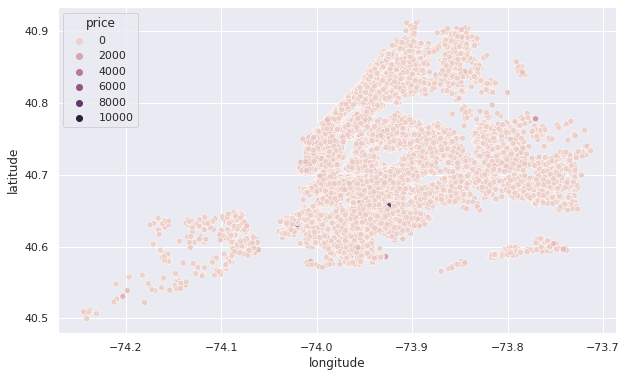

In [62]:
sns.scatterplot(x='longitude',y='latitude',hue='price',data=df,c=['r'])


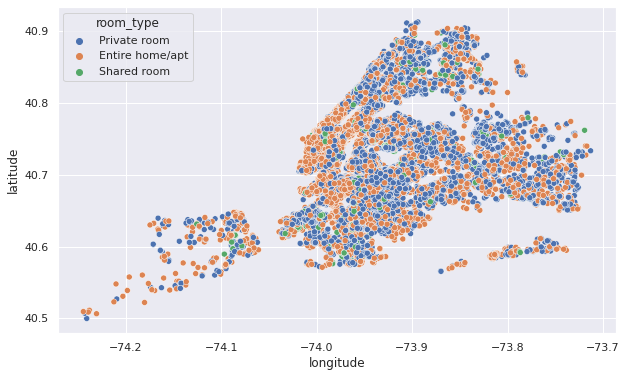

In [63]:
sns.scatterplot(x='longitude',y='latitude',hue='room_type',data=df)


At the edge people are trying to take apartment frequent

So at last we can conculde that in case of Manhattan as it's attracting the people from various kind of engaging things other than only room and also it seems like it's near sea where they can get clear view of sea people are taking more flats other  than Private room in mid people are trying to take more rooms 
but in case of 